In [70]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Dropout
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [5]:
data = pd.read_csv("/content/drive/MyDrive/hallederiz kadirin projeleri/iBeacon_RSSI_Labeled.csv")

In [6]:
data.head()

,location,date,b3001,b3002,b3003,b3004,b3005,b3006,b3007,b3008,b3009,b3010,b3011,b3012,b3013
0,O02,10-18-2016 11:15:21,-200,-200,-200,-200,-200,-78,-200,-200,-200,-200,-200,-200,-200
1,P01,10-18-2016 11:15:19,-200,-200,-200,-200,-200,-78,-200,-200,-200,-200,-200,-200,-200
2,P01,10-18-2016 11:15:17,-200,-200,-200,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200
3,P01,10-18-2016 11:15:15,-200,-200,-200,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200
4,P01,10-18-2016 11:15:13,-200,-200,-200,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200


In [7]:
data.tail()

,location,date,b3001,b3002,b3003,b3004,b3005,b3006,b3007,b3008,b3009,b3010,b3011,b3012,b3013
1415,I01,4-19-2016 9:37:46,-200,-76,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200
1416,I01,4-19-2016 9:37:39,-200,-72,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200
1417,I01,4-19-2016 9:37:36,-200,-67,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200
1418,I01,4-19-2016 9:37:26,-200,-79,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200
1419,I01,4-19-2016 9:37:23,-200,-75,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1420 entries, 0 to 1419
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   location  1420 non-null   object
 1   date      1420 non-null   object
 2   b3001     1420 non-null   int64 
 3   b3002     1420 non-null   int64 
 4   b3003     1420 non-null   int64 
 5   b3004     1420 non-null   int64 
 6   b3005     1420 non-null   int64 
 7   b3006     1420 non-null   int64 
 8   b3007     1420 non-null   int64 
 9   b3008     1420 non-null   int64 
 10  b3009     1420 non-null   int64 
 11  b3010     1420 non-null   int64 
 12  b3011     1420 non-null   int64 
 13  b3012     1420 non-null   int64 
 14  b3013     1420 non-null   int64 
dtypes: int64(13), object(2)
memory usage: 166.5+ KB


In [9]:
data["date"] = pd.to_datetime(data["date"])

In [90]:
sorted = data.sort_values(by="date", ascending=True)

In [91]:
sorted.head()

,location,date,b3001,b3002,b3003,b3004,b3005,b3006,b3007,b3008,b3009,b3010,b3011,b3012,b3013
1419,I01,2016-04-19 09:37:23,-200,-75,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200
1418,I01,2016-04-19 09:37:26,-200,-79,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200
1417,I01,2016-04-19 09:37:36,-200,-67,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200
1416,I01,2016-04-19 09:37:39,-200,-72,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200
1415,I01,2016-04-19 09:37:46,-200,-76,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200


In [12]:
print("unique date: ", data["date"].nunique())
print("sample size: ", len(data))

unique date:  1420
sample size:  1420


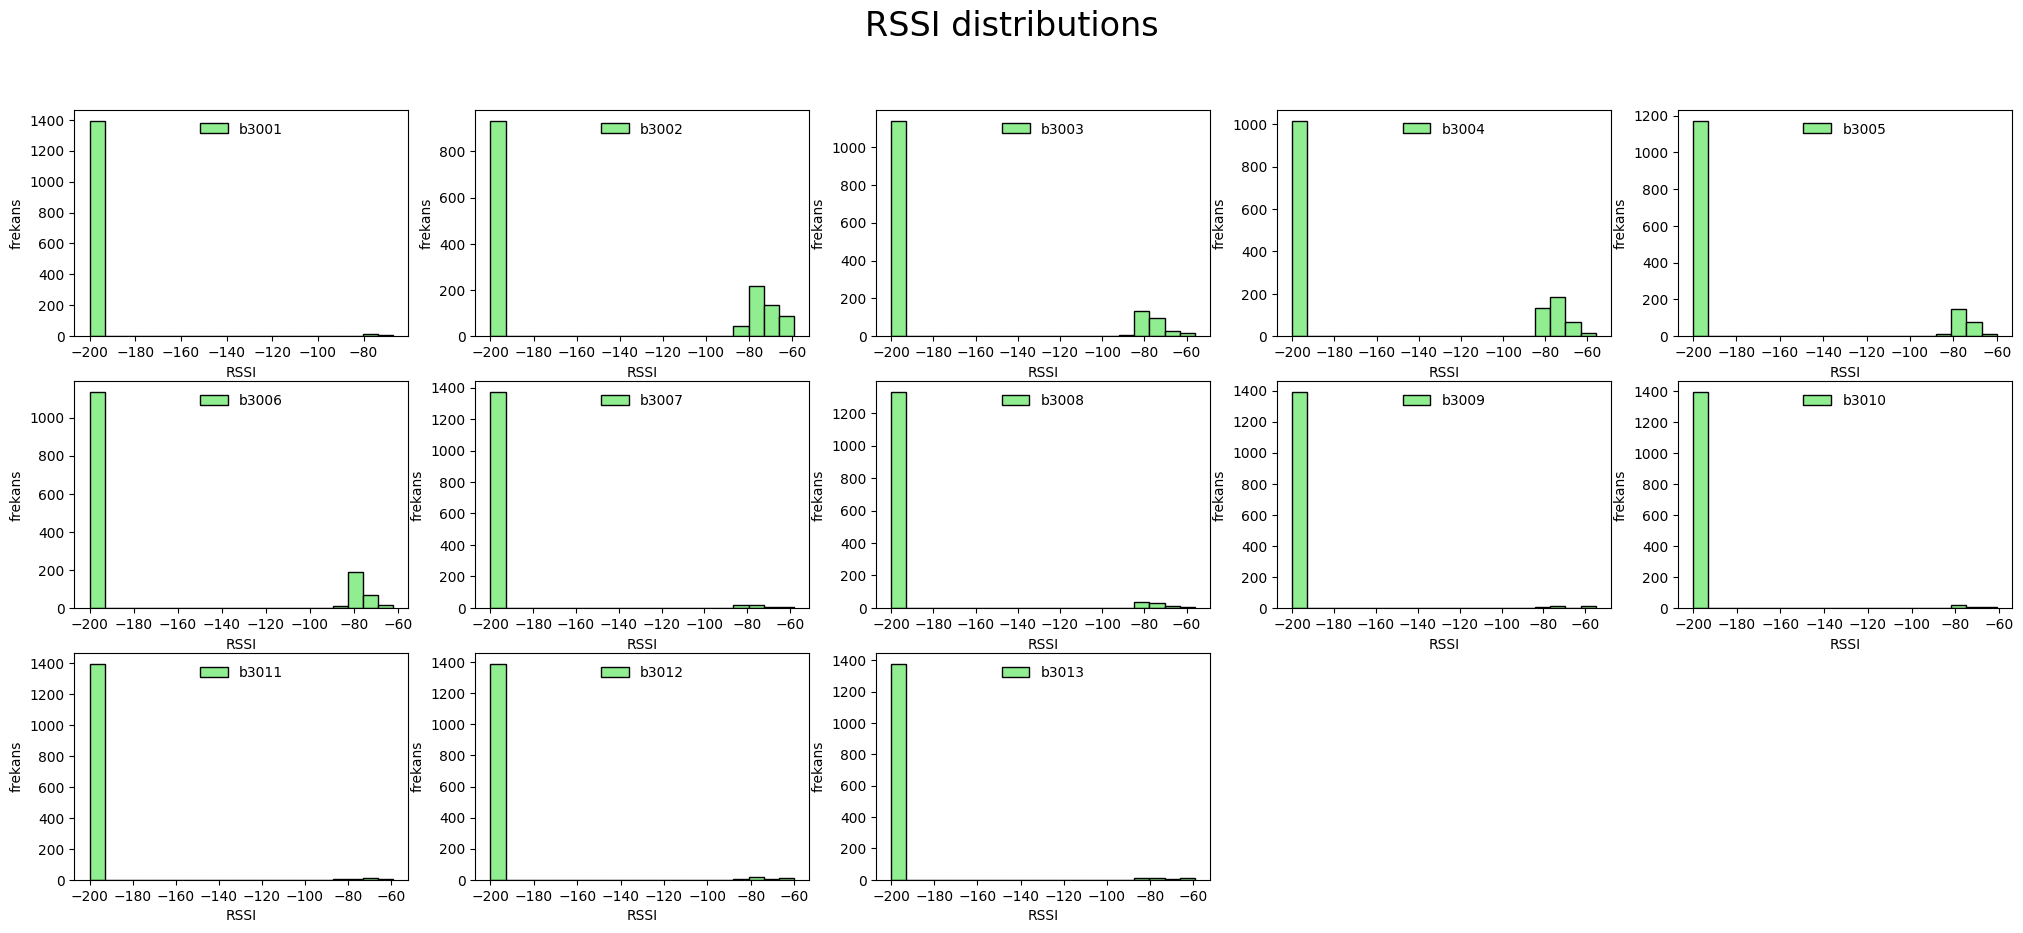

In [58]:
#@title
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(25, 10))
fig.suptitle("RSSI distributions", fontsize=24)

# Lazy counter so we can remove unwated axes
counter = 0
for i in range(3):
    for j in range(5):

        ax = axes[i][j]

        # Plot when we have data
        if counter < len(data.columns.drop(["location", "date"])):

            ax.hist(data[data.columns.drop(["location", "date"])[counter]], bins=20, color='lightgreen', ec='black', label='{}'.format(data.columns.drop(["location", "date"])[counter]))
            ax.set_xlabel('RSSI')
            ax.set_ylabel('frekans')
            leg = ax.legend(loc='upper center')
            leg.draw_frame(False)

        # Remove axis when we no longer have data
        else:
            ax.set_axis_off()

        counter += 1

plt.show()

In [68]:
data["location"].nunique()

105

In [69]:
data["location"].unique()

array(['O02', 'P01', 'P02', 'R01', 'R02', 'S01', 'S02', 'T01', 'U02',
       'U01', 'J03', 'K03', 'L03', 'M03', 'N03', 'O03', 'P03', 'Q03',
       'R03', 'S03', 'T03', 'U03', 'U04', 'T04', 'S04', 'R04', 'Q04',
       'P04', 'O04', 'N04', 'M04', 'L04', 'K04', 'J04', 'I04', 'I05',
       'J05', 'K05', 'L05', 'M05', 'N05', 'O05', 'P05', 'Q05', 'R05',
       'S05', 'T05', 'U05', 'S06', 'R06', 'Q06', 'P06', 'O06', 'N06',
       'M06', 'L06', 'K06', 'J06', 'I06', 'F08', 'J02', 'J07', 'I07',
       'I10', 'J10', 'D15', 'E15', 'G15', 'J15', 'L15', 'R15', 'T15',
       'W15', 'I08', 'I03', 'J08', 'I01', 'I02', 'J01', 'K01', 'K02',
       'L01', 'L02', 'M01', 'M02', 'N01', 'N02', 'O01', 'I09', 'D14',
       'D13', 'K07', 'K08', 'N15', 'P15', 'I15', 'S15', 'U15', 'V15',
       'S07', 'S08', 'L09', 'L08', 'Q02', 'Q01'], dtype=object)

In [92]:
# Scaling

minMax = MinMaxScaler()

numeric_data = sorted.drop(["location", "date"], axis=1)
scaled_data = pd.DataFrame(minMax.fit_transform(numeric_data), columns=numeric_data.columns)

In [93]:
scaled_data = pd.concat([sorted[["location", "date"]], scaled_data], axis=1)
scaled_data.head()

,location,date,b3001,b3002,b3003,b3004,b3005,b3006,b3007,b3008,b3009,b3010,b3011,b3012,b3013
1419,I01,2016-04-19 09:37:23,0.0,0.0,0.0,0.0,0.0,0.884058,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1418,I01,2016-04-19 09:37:26,0.0,0.0,0.0,0.0,0.0,0.884058,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1417,I01,2016-04-19 09:37:36,0.0,0.0,0.0,0.0,0.0,0.891304,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1416,I01,2016-04-19 09:37:39,0.0,0.0,0.0,0.0,0.0,0.891304,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1415,I01,2016-04-19 09:37:46,0.0,0.0,0.0,0.0,0.0,0.891304,0.0,0.0,0.0,0.0,0.0,0.0,0.0
